In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf

In [2]:
NBA=pd.read_excel("C:/Users/trent/OneDrive/Documents/Repositories/Team-Salary-Vs-Performance-Regression/data/NBA pay and performance.xlsx")

In [6]:
NBA

,Team,season,wpc,salaries
0,Atlanta Hawks,2012,0.606,55503683
1,Atlanta Hawks,2013,0.537,60437642
2,Atlanta Hawks,2014,0.463,58841508
3,Atlanta Hawks,2015,0.732,62487671
4,Atlanta Hawks,2016,0.585,82337675
...,...,...,...,...
205,Washington Wizards,2014,0.537,66615345
206,Washington Wizards,2015,0.561,74590100
207,Washington Wizards,2016,0.500,83380073
208,Washington Wizards,2017,0.598,105042249


In [3]:
NBA.describe()

,season,wpc,salaries
count,210.000000,210.000000,2.100000e+02
mean,2015.000000,0.497843,7.825339e+07
std,2.004779,0.154052,2.523282e+07
min,2012.000000,0.106000,2.893890e+07
25%,2013.000000,0.378000,5.937660e+07
50%,2015.000000,0.512000,7.372819e+07
75%,2017.000000,0.606000,9.564297e+07
max,2018.000000,0.890000,1.425601e+08


In [4]:
NBA.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210 entries, 0 to 209
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Team      210 non-null    object 
 1   season    210 non-null    int64  
 2   wpc       210 non-null    float64
 3   salaries  210 non-null    int64  
dtypes: float64(1), int64(2), object(1)
memory usage: 6.7+ KB


In [5]:
Sumsal = NBA.groupby(['season'])['salaries'].sum().reset_index().rename(columns={'salaries':'allsal'})
Sumsal

,season,allsal
0,2012,1438650614
1,2013,1837810750
2,2014,1976549213
3,2015,2153667904
4,2016,2523411764
5,2017,3159860863
6,2018,3343261288


In [ ]:
NBA = pd.merge(NBA, Sumsal, on=['season'], how='left')
display(NBA)

,Team,season,wpc,salaries,allsal
0,Atlanta Hawks,2012,0.606,55503683,1438650614
1,Atlanta Hawks,2013,0.537,60437642,1837810750
2,Atlanta Hawks,2014,0.463,58841508,1976549213
3,Atlanta Hawks,2015,0.732,62487671,2153667904
4,Atlanta Hawks,2016,0.585,82337675,2523411764
...,...,...,...,...,...
205,Washington Wizards,2014,0.537,66615345,1976549213
206,Washington Wizards,2015,0.561,74590100,2153667904
207,Washington Wizards,2016,0.500,83380073,2523411764
208,Washington Wizards,2017,0.598,105042249,3159860863


In [ ]:
# Create a new column for relative salary to gauge team spending compared to the league
NBA['relsal']= NBA['salaries']/NBA['allsal']

<Axes: xlabel='relsal', ylabel='wpc'>

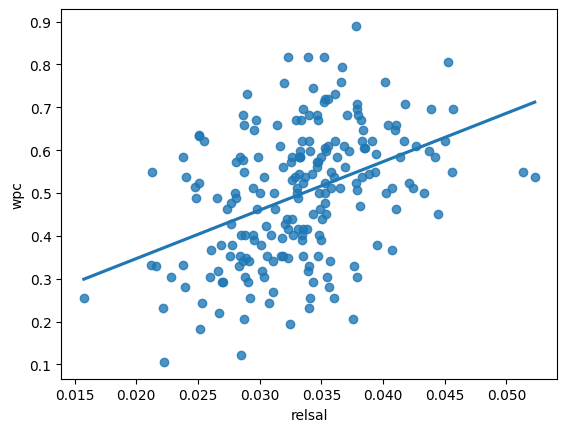

In [9]:
sns.regplot(x="relsal", y="wpc", data = NBA, ci=False)

In [10]:
wpcsal1_lm = smf.ols(formula = 'wpc ~ relsal', data=NBA).fit()
print(wpcsal1_lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    wpc   R-squared:                       0.172
Model:                            OLS   Adj. R-squared:                  0.168
Method:                 Least Squares   F-statistic:                     43.26
Date:                Wed, 27 Aug 2025   Prob (F-statistic):           3.81e-10
Time:                        21:34:19   Log-Likelihood:                 115.16
No. Observations:                 210   AIC:                            -226.3
Df Residuals:                     208   BIC:                            -219.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.1211      0.058      2.086      0.0

In [11]:
NBA.sort_values(by=['Team','season'], ascending=True)

,Team,season,wpc,salaries,allsal,relsal
0,Atlanta Hawks,2012,0.606,55503683,1438650614,0.038580
1,Atlanta Hawks,2013,0.537,60437642,1837810750,0.032886
2,Atlanta Hawks,2014,0.463,58841508,1976549213,0.029770
3,Atlanta Hawks,2015,0.732,62487671,2153667904,0.029015
4,Atlanta Hawks,2016,0.585,82337675,2523411764,0.032630
...,...,...,...,...,...,...
205,Washington Wizards,2014,0.537,66615345,1976549213,0.033703
206,Washington Wizards,2015,0.561,74590100,2153667904,0.034634
207,Washington Wizards,2016,0.500,83380073,2523411764,0.033043
208,Washington Wizards,2017,0.598,105042249,3159860863,0.033243


Taking into account the win percentage in the previous season

In [12]:
NBA['wpc_lag'] = NBA.groupby('Team')['wpc'].shift(1)
NBA

,Team,season,wpc,salaries,allsal,relsal,wpc_lag
0,Atlanta Hawks,2012,0.606,55503683,1438650614,0.038580,NaN
1,Atlanta Hawks,2013,0.537,60437642,1837810750,0.032886,0.606
2,Atlanta Hawks,2014,0.463,58841508,1976549213,0.029770,0.537
3,Atlanta Hawks,2015,0.732,62487671,2153667904,0.029015,0.463
4,Atlanta Hawks,2016,0.585,82337675,2523411764,0.032630,0.732
...,...,...,...,...,...,...,...
205,Washington Wizards,2014,0.537,66615345,1976549213,0.033703,0.354
206,Washington Wizards,2015,0.561,74590100,2153667904,0.034634,0.537
207,Washington Wizards,2016,0.500,83380073,2523411764,0.033043,0.561
208,Washington Wizards,2017,0.598,105042249,3159860863,0.033243,0.500


In [13]:
pd.set_option('display.max_rows', 250)
NBA

,Team,season,wpc,salaries,allsal,relsal,wpc_lag
0,Atlanta Hawks,2012,0.606,55503683,1438650614,0.038580,NaN
1,Atlanta Hawks,2013,0.537,60437642,1837810750,0.032886,0.606
2,Atlanta Hawks,2014,0.463,58841508,1976549213,0.029770,0.537
3,Atlanta Hawks,2015,0.732,62487671,2153667904,0.029015,0.463
4,Atlanta Hawks,2016,0.585,82337675,2523411764,0.032630,0.732
5,Atlanta Hawks,2017,0.524,105882053,3159860863,0.033508,0.585
6,Atlanta Hawks,2018,0.293,97118111,3343261288,0.029049,0.524
7,Boston Celtics,2012,0.591,56768577,1438650614,0.039460,NaN
8,Boston Celtics,2013,0.506,69572590,1837810750,0.037856,0.591
9,Boston Celtics,2014,0.305,70105837,1976549213,0.035469,0.506


In [ ]:
# Regression with lagged win percentage and relative salary
wpcsal2_lm = smf.ols(formula = 'wpc ~wpc_lag + relsal', data=NBA).fit()
print(wpcsal2_lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    wpc   R-squared:                       0.416
Model:                            OLS   Adj. R-squared:                  0.410
Method:                 Least Squares   F-statistic:                     62.78
Date:                Wed, 27 Aug 2025   Prob (F-statistic):           2.64e-21
Time:                        21:43:27   Log-Likelihood:                 129.13
No. Observations:                 179   AIC:                            -252.3
Df Residuals:                     176   BIC:                            -242.7
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.1293      0.054      2.374      0.0

Adding fixed effect for each team to show each team is unique in how salary and last seasons win % effect them

In [15]:
wpcsal3_lm = smf.ols(formula = 'wpc ~ wpc_lag + relsal +C(Team)', data=NBA).fit()
print(wpcsal3_lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    wpc   R-squared:                       0.585
Model:                            OLS   Adj. R-squared:                  0.498
Method:                 Least Squares   F-statistic:                     6.686
Date:                Wed, 27 Aug 2025   Prob (F-statistic):           5.88e-16
Time:                        21:52:30   Log-Likelihood:                 159.66
No. Observations:                 179   AIC:                            -255.3
Df Residuals:                     147   BIC:                            -153.3
Df Model:                          31                                         
Covariance Type:            nonrobust                                         
                                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
Interc